<a href="https://colab.research.google.com/github/Alan-Hans/Portafolio-DataScientist/blob/main/LinearRegresionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Real estate assets

This project is about the value of real estate assets. We going to predict using the value with different data. This dataset was obtained from: https://archive.ics.uci.edu/ml/index.php

First we import the data and add the tittle of each colummn.

In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Second, we analize the data in general, visual and numeric.

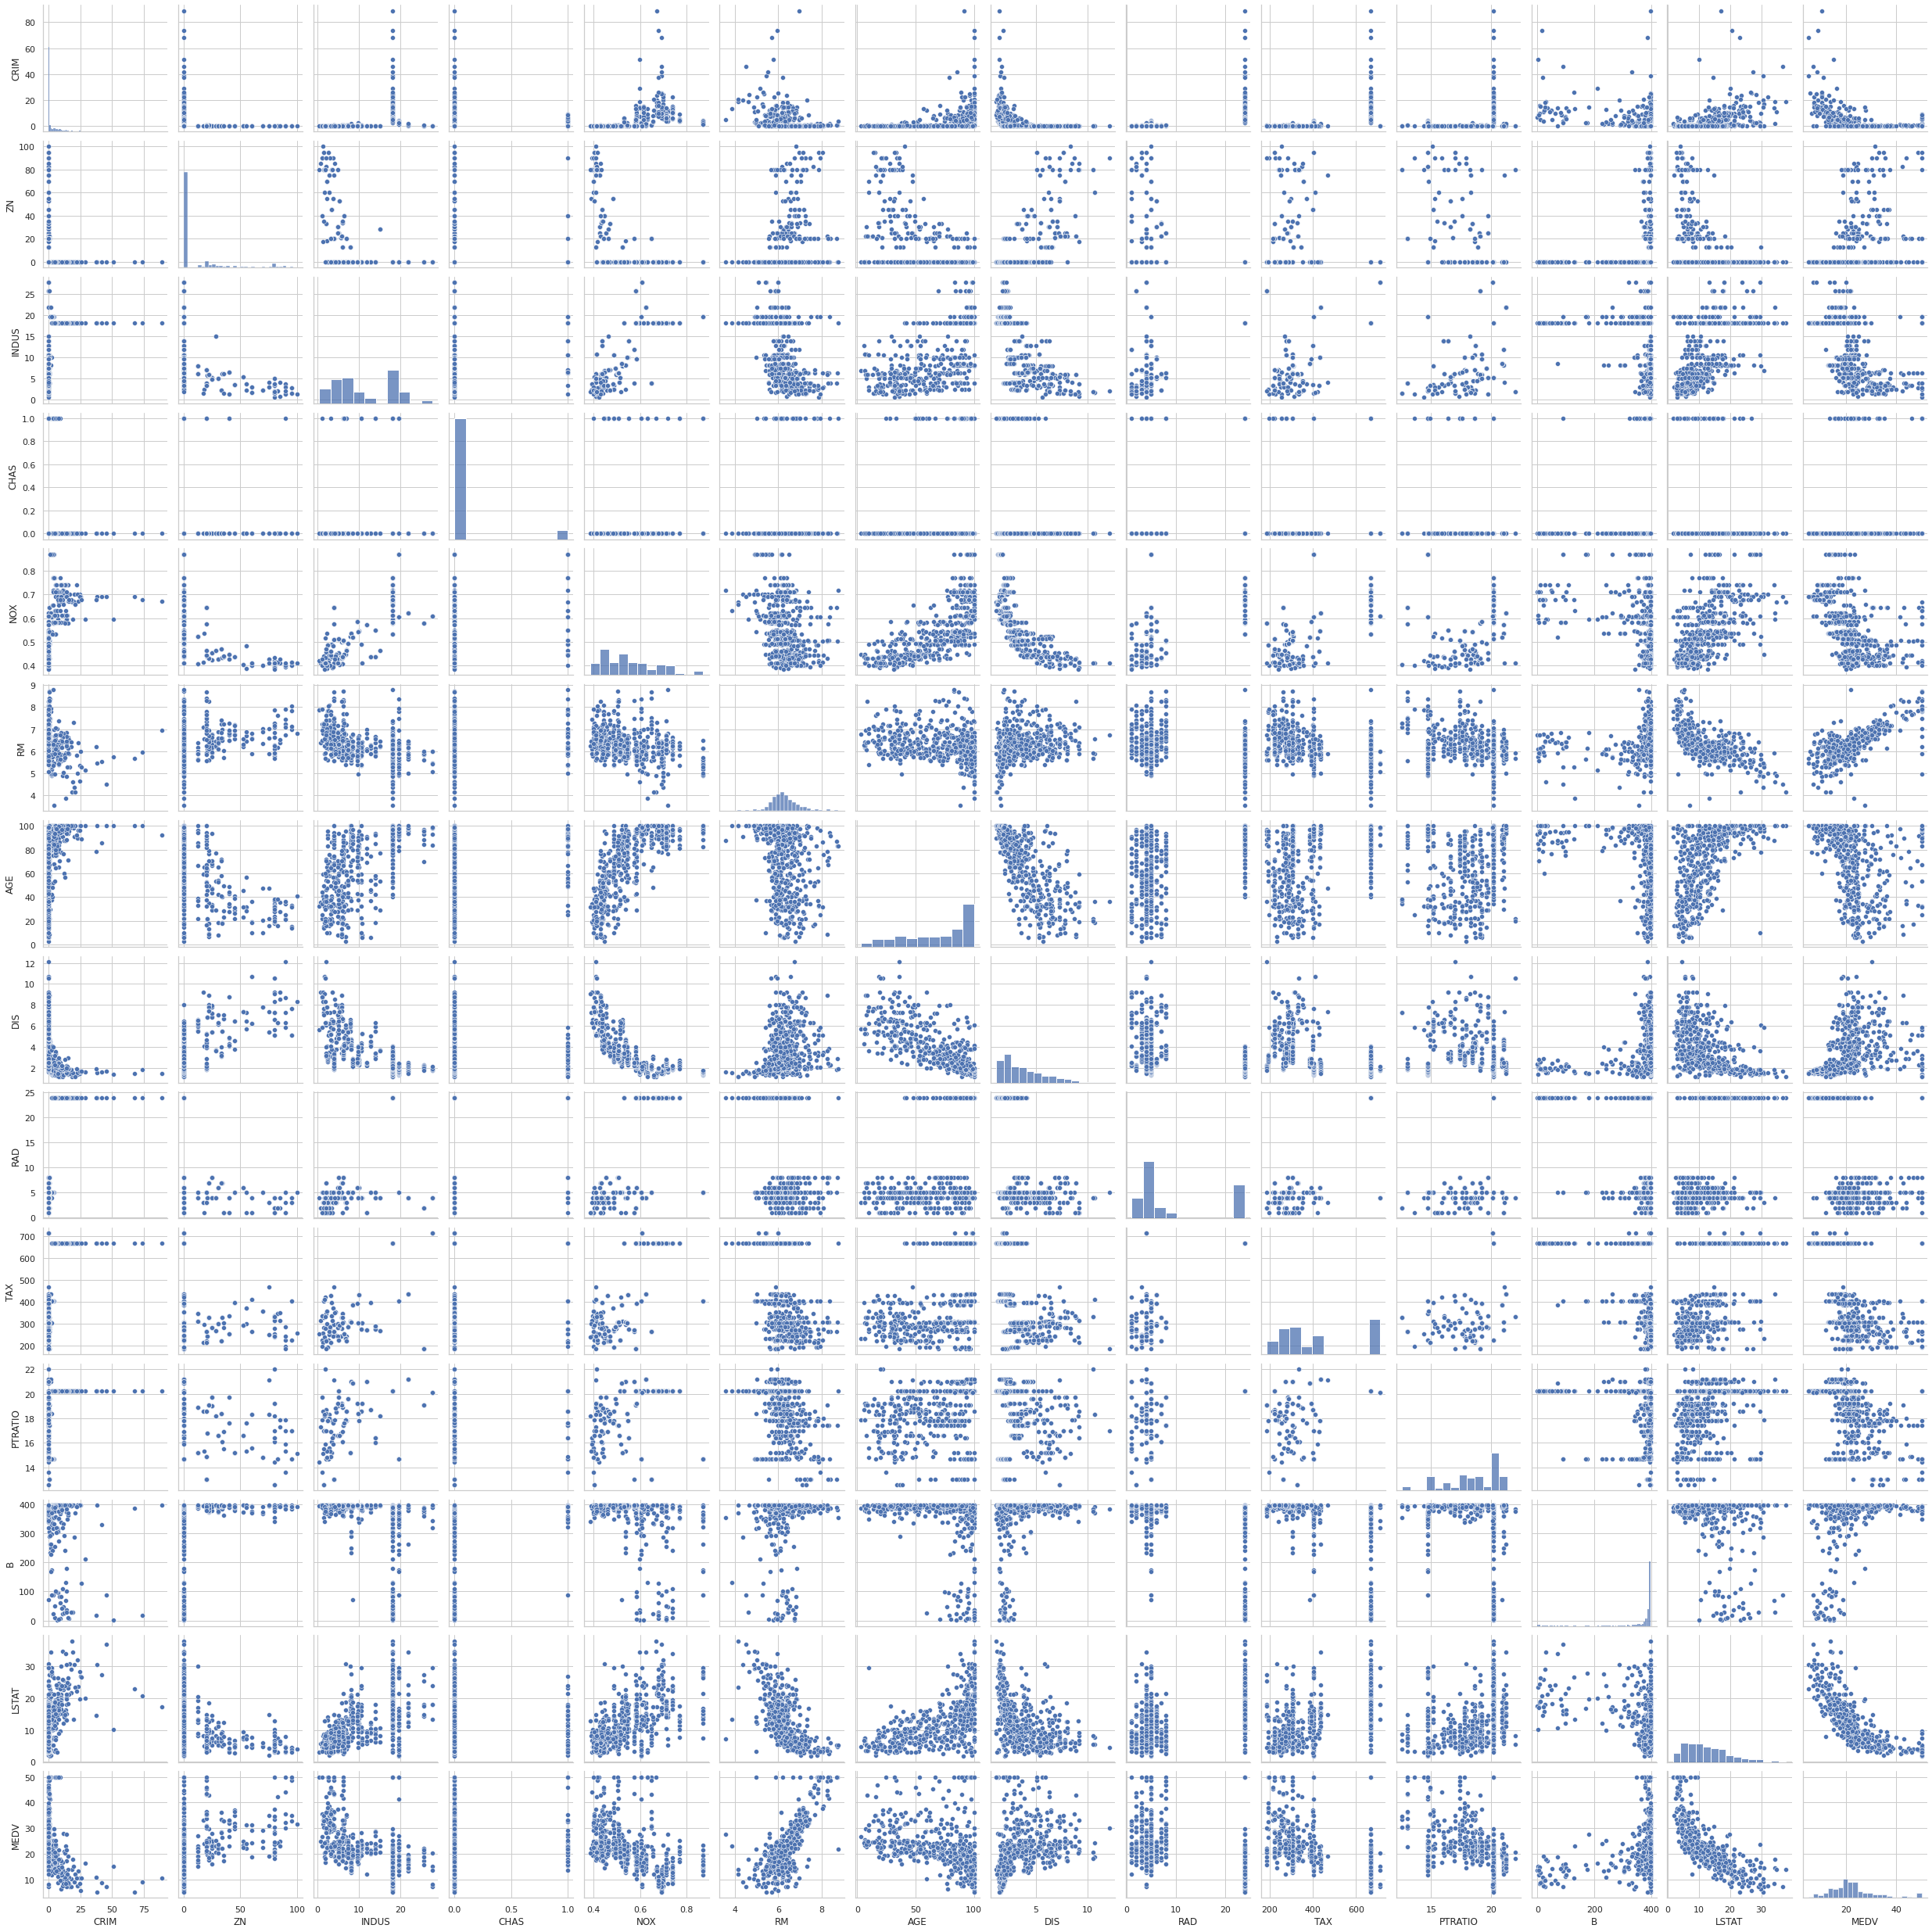

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid', context='notebook')
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
sns.pairplot(df[cols], height=2.5)
plt.show()

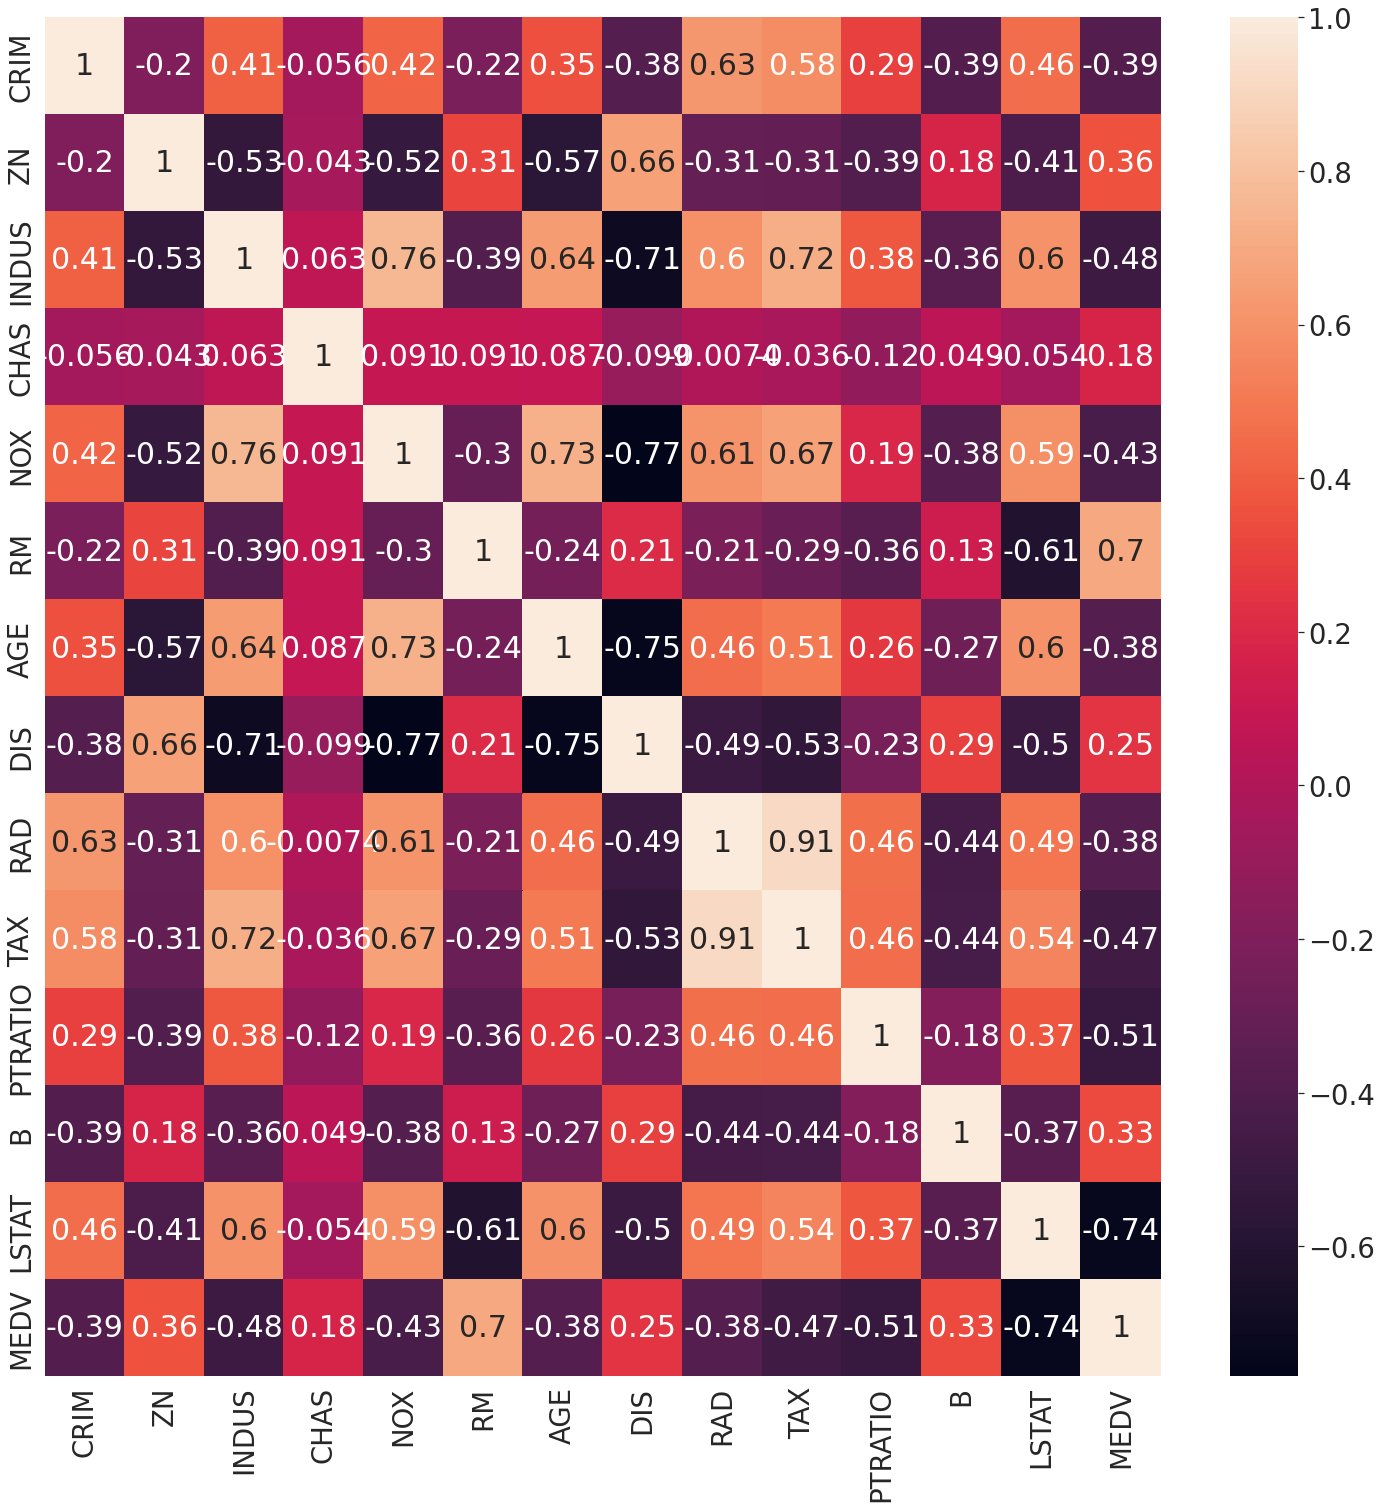

In [39]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,25))   
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=2.5)
sns.heatmap(cm, cbar=True, annot=True,yticklabels=cols,xticklabels=cols)

The variable that we want to know is MEDV, represent the value of the property in $1000, we can order the correlation which are involved only with MEDV.

In [22]:
correlation_mat = df.corr()
corr_values['MEDV'].sort_values(kind="quicksort")

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
dtype: float64

In [ ]:
According to the correlation list values, we going to put our attention in LSTAT, RM and PTRATIO. The 3 variables that have more impact in MEDV.

#Linear Regression

In [52]:
X = df[['RM','CRIM']]




In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df['RM'].values.reshape(-1, 1)
y = df['MEDV'].values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

Text(0.5, 0, 'Promedio de habitaciones [RM]')

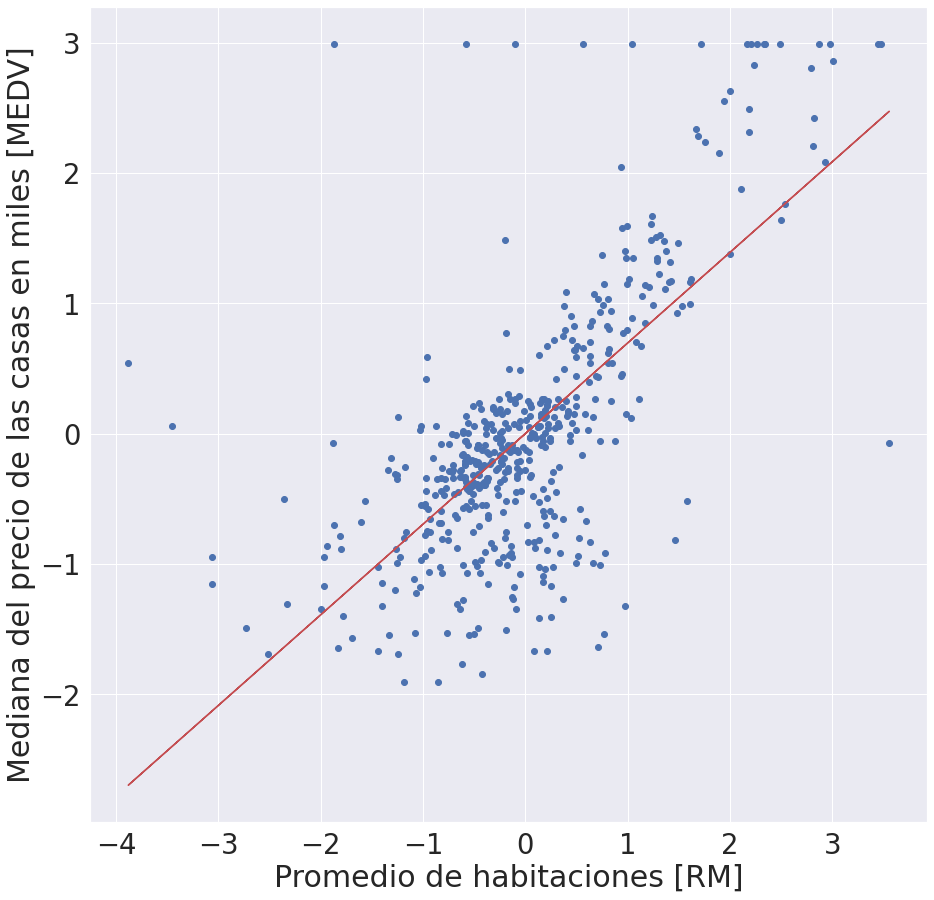

In [90]:
fig, ax = plt.subplots(figsize=(15,15))  
plt.scatter(X_std,y_std)
plt.plot(X_std,slr.predict(X_std), color='R')
plt.ylabel("Mediana del precio de las casas en miles [MEDV]")
plt.xlabel("Promedio de habitaciones [RM]")

Using the preddiction model create only with the parameter RM

In [36]:
num_rooms = 5
num_rooms_std = sc_x.transform(np.array([num_rooms]).reshape(-1,1))
print("The value of a house with 5 rooms in boston is ", sc_y.inverse_transform(slr.predict(num_rooms_std)))

The value of a house with 5 rooms in boston is  [[10.83992413]]
